In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data190931


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

fcn.ipynb


In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [5]:
!pip install d2l

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 954.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 985.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 873.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 kB 643.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 89

In [6]:
%matplotlib inline
import warnings
from d2l import paddle as d2l
warnings.filterwarnings("ignore")
import paddle
import paddle.vision as paddlevision
from paddle import nn
from paddle.nn import functional as F

In [7]:
pretrained_net=paddlevision.models.resnet18(pretrained=True)
list(pretrained_net.children())[-3:]

W0212 21:04:57.617693   179 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 8.0, Driver API Version: 11.2, Runtime API Version: 11.2
W0212 21:04:57.620718   179 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.
100%|██████████| 69183/69183 [00:11<00:00, 5850.05it/s] 


[Sequential(
   (0): BasicBlock(
     (conv1): Conv2D(256, 512, kernel_size=[3, 3], stride=[2, 2], padding=1, data_format=NCHW)
     (bn1): BatchNorm2D(num_features=512, momentum=0.9, epsilon=1e-05)
     (relu): ReLU()
     (conv2): Conv2D(512, 512, kernel_size=[3, 3], padding=1, data_format=NCHW)
     (bn2): BatchNorm2D(num_features=512, momentum=0.9, epsilon=1e-05)
     (downsample): Sequential(
       (0): Conv2D(256, 512, kernel_size=[1, 1], stride=[2, 2], data_format=NCHW)
       (1): BatchNorm2D(num_features=512, momentum=0.9, epsilon=1e-05)
     )
   )
   (1): BasicBlock(
     (conv1): Conv2D(512, 512, kernel_size=[3, 3], padding=1, data_format=NCHW)
     (bn1): BatchNorm2D(num_features=512, momentum=0.9, epsilon=1e-05)
     (relu): ReLU()
     (conv2): Conv2D(512, 512, kernel_size=[3, 3], padding=1, data_format=NCHW)
     (bn2): BatchNorm2D(num_features=512, momentum=0.9, epsilon=1e-05)
   )
 ),
 AdaptiveAvgPool2D(output_size=(1, 1)),
 Linear(in_features=512, out_features=1000,

In [8]:
net=nn.Sequential(*list(pretrained_net.children())[:-2])

In [9]:
num_classes=21
net.add_sublayer('final_conv', nn.Conv2D(512,num_classes,kernel_size=1))
net.add_sublayer('transpose_conv',nn.Conv2DTranspose(num_classes,num_classes,kernel_size=64,padding=16,stride=32))

Conv2DTranspose(21, 21, kernel_size=[64, 64], stride=[32, 32], padding=16, data_format=NCHW)

In [10]:
paddle.summary(net,input_size=(1,3,380,460))

-----------------------------------------------------------------------------
  Layer (type)        Input Shape          Output Shape         Param #    
    Conv2D-1       [[1, 3, 380, 460]]   [1, 64, 190, 230]        9,408     
  BatchNorm2D-1   [[1, 64, 190, 230]]   [1, 64, 190, 230]         256      
     ReLU-1       [[1, 64, 190, 230]]   [1, 64, 190, 230]          0       
   MaxPool2D-1    [[1, 64, 190, 230]]    [1, 64, 95, 115]          0       
    Conv2D-2       [[1, 64, 95, 115]]    [1, 64, 95, 115]       36,864     
  BatchNorm2D-2    [[1, 64, 95, 115]]    [1, 64, 95, 115]         256      
     ReLU-2        [[1, 64, 95, 115]]    [1, 64, 95, 115]          0       
    Conv2D-3       [[1, 64, 95, 115]]    [1, 64, 95, 115]       36,864     
  BatchNorm2D-3    [[1, 64, 95, 115]]    [1, 64, 95, 115]         256      
  BasicBlock-1     [[1, 64, 95, 115]]    [1, 64, 95, 115]          0       
    Conv2D-4       [[1, 64, 95, 115]]    [1, 64, 95, 115]       36,864     
  BatchNor

{'total_params': 13003242, 'trainable_params': 12993642}

In [11]:
def bilinear_kernel(in_channels, out_channels, kernel_size):
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = (paddle.arange(kernel_size).reshape([-1, 1]),
          paddle.arange(kernel_size).reshape([1, -1]))
    filt = (1 - paddle.abs(og[0] - center) / factor) * \
           (1 - paddle.abs(og[1] - center) / factor)
    weight = paddle.zeros((in_channels, out_channels,
                          kernel_size, kernel_size))
    weight[range(in_channels), range(out_channels), :, :] = filt
    return weight

In [12]:
W=bilinear_kernel(num_classes, num_classes, 64)
net.transpose_conv.weight.set_value(W);

In [13]:
!pwd

/home/aistudio/work


In [14]:
d2l.download??

Signature: d2l.download(name, cache_dir='../data')
Source:   
def download(name, cache_dir=os.path.join('..', 'data')):
    """下载一个DATA_HUB中的文件，返回本地文件名

    Defined in :numref:`sec_kaggle_house`"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # 命中缓存
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname
File:      /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/d2l/paddle.py
Type:      function


In [15]:
d2l.download_extract??

Signature: d2l.download_extract(name, folder=None)
Source:   
def download_extract(name, folder=None):
    """下载并解压zip/tar文件

    Defined in :numref:`sec_kaggle_house`"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir
File:      /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/d2l/paddle.py
Type:      function


In [16]:
import os
os.getcwd()

'/home/aistudio/work'

In [17]:
print(os.path.join('./VOCdevkit', 'VOC2012'))

./VOCdevkit/VOC2012


In [18]:
os.path.splitext('/home/aistudio/data/VOCtrainval_11-May-2012.tar')

('/home/aistudio/data/VOCtrainval_11-May-2012', '.tar')

In [20]:
def download_extract(folder=None):
    """下载并解压zip/tar文件

    Defined in :numref:`sec_kaggle_house`"""
    # fname = download(name)
    fname='/home/aistudio/data/VOCtrainval_11-May-2012.tar'
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = d2l.tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir
def load_data_voc(batch_size, crop_size):
    # voc_dir = d2l.download_extract('voc2012', os.path.join('./VOCdevkit', 'VOC2012'))
    voc_dir=download_extract(os.path.join('../data/VOCdevkit', 'VOC2012'))
    train_iter = paddle.io.DataLoader(
        d2l.VOCSegDataset(True, crop_size, voc_dir), batch_size=batch_size,
        shuffle=True, return_list=True, drop_last=True, num_workers=0)
    test_iter = paddle.io.DataLoader(
        d2l.VOCSegDataset(False, crop_size, voc_dir), batch_size=batch_size,
        drop_last=True, return_list=True, num_workers=0)
    return train_iter, test_iter

batch_size, crop_size = 32, (320, 480)
train_iter, test_iter = load_data_voc(batch_size, crop_size)

read 1114 examples
read 1078 examples


loss 0.364, train acc 0.883, test acc 0.842
430.8 examples/sec on [Place(gpu:0)]


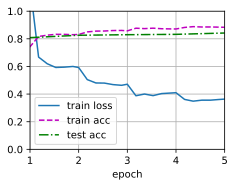

In [21]:
def loss(input,targets):
    return F.cross_entropy(input.transpose([0,2,3,1]),targets,reduction='none').mean(1).mean(1)
num_epochs,lr,wd,devices=5,0.001,1e-3,d2l.try_all_gpus()
trainer=paddle.optimizer.SGD(learning_rate=lr,parameters=net.parameters(),weight_decay=wd)
d2l.train_ch13(net,train_iter,test_iter,loss,trainer,num_epochs,devices[:1])

In [25]:
def predict(img):
    X = paddle.to_tensor(test_iter.dataset.normalize_image(img),dtype='float32').unsqueeze(0)
    pred = net(X).argmax(axis=1)
    return pred.reshape([pred.shape[1], pred.shape[2]])

In [26]:
def label2image(pred):
    colormap = paddle.to_tensor(d2l.VOC_COLORMAP)
    X = pred.astype(paddle.int32)
    return colormap[X]

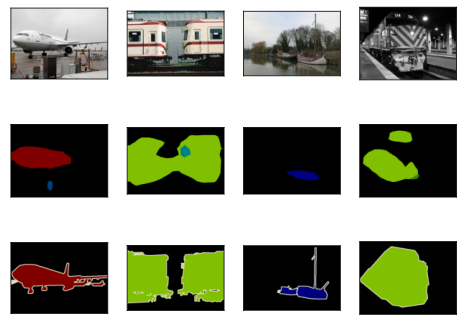

In [27]:
voc_dir = download_extract(os.path.join('../data/VOCdevkit', 'VOC2012'))
test_images, test_labels = d2l.read_voc_images(voc_dir, False)
n, imgs = 4, []
for i in range(n):
    crop_rect = (0, 0, 320, 480)
    X = paddlevision.transforms.crop(test_images[i], *crop_rect)
    pred = label2image(predict(X))
    imgs += [X.transpose([1,2,0]).astype('uint8'), pred,
             paddlevision.transforms.crop(
                 test_labels[i], *crop_rect).transpose([1, 2, 0]).astype("uint8")]
d2l.show_images(imgs[::3] + imgs[1::3] + imgs[2::3], 3, n, scale=2);

In [28]:
import paddle
from paddle.vision.transforms import ToTensor

# 加载数据集
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=ToTensor())
val_dataset =  paddle.vision.datasets.MNIST(mode='test', transform=ToTensor())

# 模型组网
mnist = paddle.nn.Sequential(
    paddle.nn.Flatten(),
    paddle.nn.Linear(784, 512),
    paddle.nn.ReLU(),
    paddle.nn.Dropout(0.2),
    paddle.nn.Linear(512, 10)
)

# 封装模型
model = paddle.Model(mnist)

# 配置训练模型
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 模型训练
model.fit(train_dataset,
          epochs=5,
          batch_size=64,
          verbose=1)
# 模型评估
model.evaluate(val_dataset, verbose=0)

# 模型测试
model.predict(val_dataset)


item  180/2421 [=>............................] - ETA: 1s - 720us/item

Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-images-idx3-ubyte.gz 
Begin to download


item 8/8 [============================>.] - ETA: 0s - 3ms/item


Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-labels-idx1-ubyte.gz 
Begin to download

Download finished


item  55/403 [===>..........................] - ETA: 0s - 2ms/item

Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-images-idx3-ubyte.gz 
Begin to download


item 2/2 [===========================>..] - ETA: 0s - 2ms/item


Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-labels-idx1-ubyte.gz 
Begin to download

Download finished


The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.1149 - acc: 0.9285 - 15ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0822 - acc: 0.9678 - 13ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0572 - acc: 0.9779 - 13ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0043 - acc: 0.9829 - 13ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0809 - acc: 0.9857 - 14ms/step          
Predict begin...
step 10000/10000 [==============================] - 1ms/step          
Predict samples: 10000


[(array([[ -6.175232  ,  -5.9996624 ,  -3.3473842 ,   1.0960237 ,
          -11.345771  ,  -2.6083665 , -16.120361  ,  12.978523  ,
           -2.931695  ,  -0.20977318]], dtype=float32),
  array([[ -7.491399  ,   4.410669  ,  13.064967  ,  -1.2715386 ,
          -20.196796  ,  -3.7455144 ,  -7.646246  , -16.118296  ,
           -0.93745565, -15.369725  ]], dtype=float32),
  array([[-8.609545  ,  7.8816705 , -2.5376844 , -6.1778927 , -2.1104758 ,
          -5.325159  , -4.364438  ,  0.08102702, -2.1863177 , -8.611977  ]],
        dtype=float32),
  array([[ 7.696717 , -5.1124687, -2.8630362, -5.1779613, -6.045631 ,
          -3.1143305, -2.4545627, -3.9270957, -9.979651 , -1.3881547]],
        dtype=float32),
  array([[-5.269042  , -9.351614  , -2.2156408 , -9.696586  , 11.020708  ,
          -7.8159537 , -5.9518394 ,  0.09891282, -4.784528  ,  4.0909705 ]],
        dtype=float32),
  array([[-9.974525 , 10.25972  , -5.517895 , -6.8237023, -1.7712889,
          -8.574486 , -8.278457 ,  3